In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_128, '^-', linestyle='dashed', label='bsz=128')
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_256, 's-', linestyle='dotted', label='bsz=256')
/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_12470/269400043.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M, accuracy_bsz_512, 'x-', linestyle='dashdot', label='bsz=512')
/var/folders/gt/cjpcl37j

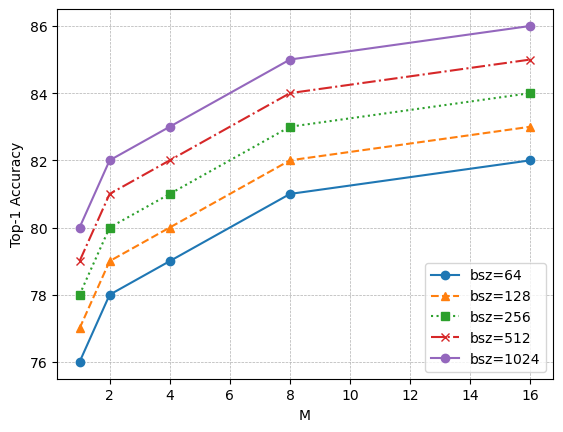

In [3]:
# Let's assume some data that could have generated the graph,
# since the exact data points are not given.
# M values
M = np.array([1, 2, 4, 8, 16])

# Top-1 Accuracy for different batch sizes (bsz)
accuracy_bsz_64 = np.array([76, 78, 79, 81, 82])
accuracy_bsz_128 = np.array([77, 79, 80, 82, 83])
accuracy_bsz_256 = np.array([78, 80, 81, 83, 84])
accuracy_bsz_512 = np.array([79, 81, 82, 84, 85])
accuracy_bsz_1024 = np.array([80, 82, 83, 85, 86])

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plotting the lines for different batch sizes
ax.plot(M, accuracy_bsz_64, 'o-', label='bsz=64')
ax.plot(M, accuracy_bsz_128, '^-', linestyle='dashed', label='bsz=128')
ax.plot(M, accuracy_bsz_256, 's-', linestyle='dotted', label='bsz=256')
ax.plot(M, accuracy_bsz_512, 'x-', linestyle='dashdot', label='bsz=512')
ax.plot(M, accuracy_bsz_1024, 'o-', linestyle='solid', label='bsz=1024')

# Adding legend to the plot
ax.legend()

# Setting labels for x and y axis
ax.set_xlabel('M')
ax.set_ylabel('Top-1 Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()


/var/folders/gt/cjpcl37j15s8yxsjswrtpxf40000gn/T/ipykernel_20663/3948407549.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])


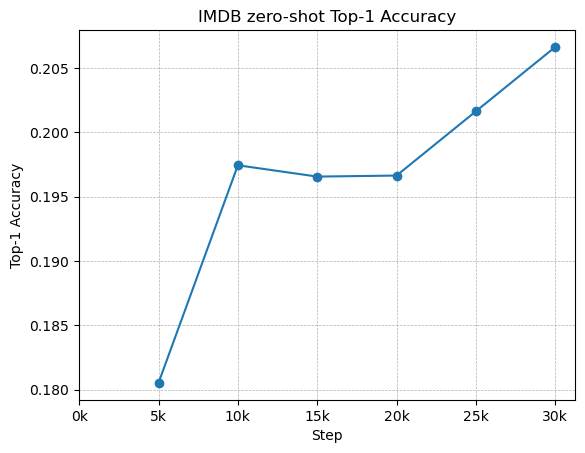

In [7]:
accuracy = pd.read_csv('data/imdb_2024-04-24.csv')
accuracy = accuracy[accuracy.columns[1]]
accuracy = accuracy[accuracy.shift() != accuracy]
accuracy.index = np.arange(5000, 30_001, 5000)


# Create a new figure and axis object
fig, ax = plt.subplots()

# Plotting the lines for different batch sizes
ax.plot(accuracy.index, accuracy, 'o-')


# Setting labels for x and y axis
ax.set_xlabel('Step')
ax.set_ylabel('Top-1 Accuracy')

# Setting the x-axis to be logarithmic
#ax.set_xscale('log', base=2)

# Enabling grid
ax.grid(True, which="both", ls="--", linewidth=0.5)

# start x-axis at 0
ax.set_xlim(left=0)
#ax.set_ylim(0.5) -> imdb is binary with equal class distribution

# round x-ticks to thousands
ax.set_xticklabels([f'{int(x/1000)}k' for x in ax.get_xticks()])

ax.set_title('IMDB zero-shot Top-1 Accuracy')

# Save the plot as a .png file
#plt.savefig('/data')

# Show the plot
plt.show()
